In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import os
from PIL import Image


In [2]:
data_dir = 'rice_leaf_diseases'
categories = os.listdir(data_dir)

data = []
labels = []

for category in categories:
    folder_path = os.path.join(data_dir, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        image = Image.open(img_path)
        image = image.resize((64, 64))  # Resize image to 64x64
        data.append(np.array(image))
        labels.append(category)

data = np.array(data)
labels = np.array(labels)


In [3]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(categories), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)


In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[early_stopping])


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8294 - loss: 0.4209 - val_accuracy: 0.8333 - val_loss: 0.4339
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8398 - loss: 0.3733 - val_accuracy: 0.8333 - val_loss: 0.4265
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8776 - loss: 0.3855 - val_accuracy: 0.7917 - val_loss: 0.4938
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8633 - loss: 0.3717 - val_accuracy: 0.6667 - val_loss: 0.6498
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8151 - loss: 0.3813 - val_accuracy: 0.8333 - val_loss: 0.4482
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9049 - loss: 0.3235 - val_accuracy: 0.8333 - val_loss: 0.4373
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7721 - loss: 0.4728 - val_accuracy: 0.7083 - val_loss: 0.4804


In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {scores[1] * 100}%')


Accuracy: 83.33333134651184%


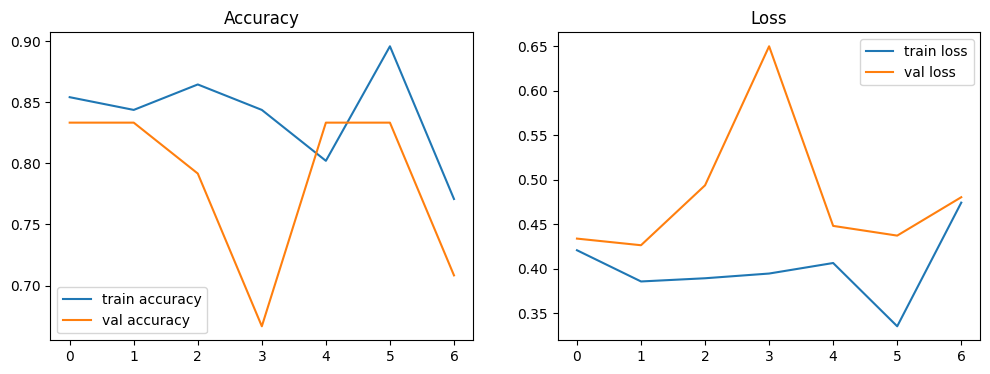

In [17]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

plt.show()


In [18]:
model.save('rice_leaf_disease_model.h5')


In [19]:
def predict_image(image_path):
    image = Image.open(image_path)
    image = image.resize((64, 64))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    
    prediction = model.predict(image)
    return categories[np.argmax(prediction)]

print(predict_image('rice_leaf_diseases\Leaf smut\DSC_0318.JPG'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Leaf smut


<>:10: SyntaxWarning: invalid escape sequence '\L'
<>:10: SyntaxWarning: invalid escape sequence '\L'
C:\Users\KIIT\AppData\Local\Temp\ipykernel_8856\4116998328.py:10: SyntaxWarning: invalid escape sequence '\L'
  print(predict_image('rice_leaf_diseases\Leaf smut\DSC_0318.JPG'))


In [24]:
import os

data_dir = 'rice_leaf_diseases'
categories = os.listdir(data_dir)
